#### Problem Statement:
This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html

Donor: Ronny Kohavi and Barry Becker, Data Mining and
Visualization Silicon Graphics. e-mail: ronnyk@sgi.com for questions.

Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random). 48842 instances, mix of continuous and discrete (train=32561, test=16281) 45222 if instances with unknown values are removed (train=30162, test=15060) Duplicate or conflicting instances : 6 Class probabilities for adult.

all file Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)

Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year. Conversion of original data as follows:

Discretized a gross income into two ranges with a threshold 50,000.
Convert U.S. to US to avoid periods.
Convert Unknown to "?"
Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight) The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.

These are:

A single cell estimate of the population 16+ for each state.
Controls for Hispanic Origin by age and sex.
Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights.

There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Problem 1: The prediction task is to determine whether a person makes over 50K a year.

Problem 2: Which factors are important

Problem 3: Which algorithms are best for this dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [3]:
income_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names= ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
income_df = pd.read_csv(income_data, na_values=[" ?"],
                         header=None, 
                         names = names)
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Cleaning

## Handling Missing Values

In [5]:
income_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
predclass            0
dtype: int64

In [6]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [7]:
my_df = income_df.dropna()

my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
dtype: int64

## Feature Engineering

In [8]:

print("Unique Values in each Feature:\n")
print('workclass\n',my_df.workclass.unique())
print('\neducation\n',my_df.education.unique())
print('\nmarital-status\n',my_df['marital-status'].unique())
print('\noccupation\n',my_df.occupation.unique())
print('\nrelationship\n',my_df.relationship.unique())
print('\nrace\n',my_df.race.unique())
print('\nsex\n',my_df.sex.unique())
print('\nnative-country\n',my_df['native-country'].unique())
print('\npredclass\n',my_df.predclass.unique())

Unique Values in each Feature:

workclass
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

education
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

marital-status
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

relationship
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
 [' Male' ' Female']

native-country
 [' United-States' ' Cuba' 

### Predclass

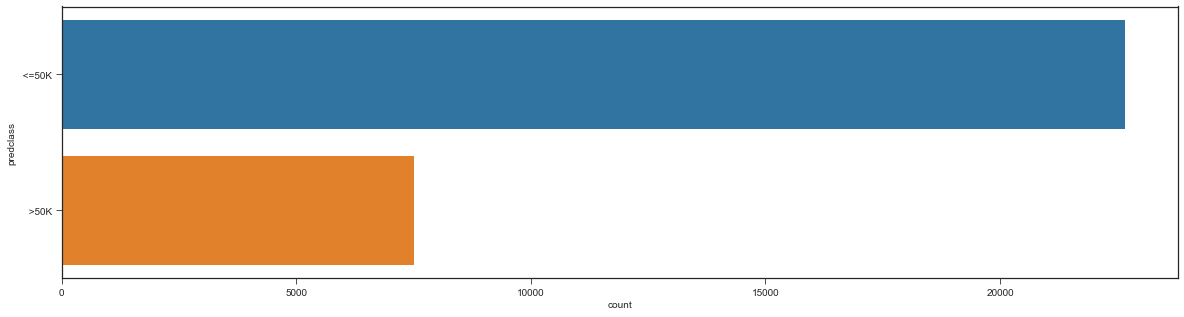

In [10]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df, order=my_df['predclass'].value_counts().index)

Income Level < 50K" is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed.

However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

#### Education

In [11]:
my_df['education'].replace(' Preschool', 'dropout',inplace=True)
my_df['education'].replace(' 10th', 'dropout',inplace=True)
my_df['education'].replace(' 11th', 'dropout',inplace=True)
my_df['education'].replace(' 12th', 'dropout',inplace=True)
my_df['education'].replace(' 1st-4th', 'dropout',inplace=True)
my_df['education'].replace(' 5th-6th', 'dropout',inplace=True)
my_df['education'].replace(' 7th-8th', 'dropout',inplace=True)
my_df['education'].replace(' 9th', 'dropout',inplace=True)
my_df['education'].replace(' HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace(' HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace(' Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace(' Masters', 'Masters',inplace=True)
my_df['education'].replace(' Prof-school', 'Masters',inplace=True)
my_df['education'].replace(' Doctorate', 'Doctorate',inplace=True)

C:\Users\Priyanka\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
my_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.249885
0,Bachelors,13.000000
1,CommunityCollege,10.369510
3,HighGrad,9.000000
5,dropout,5.609730


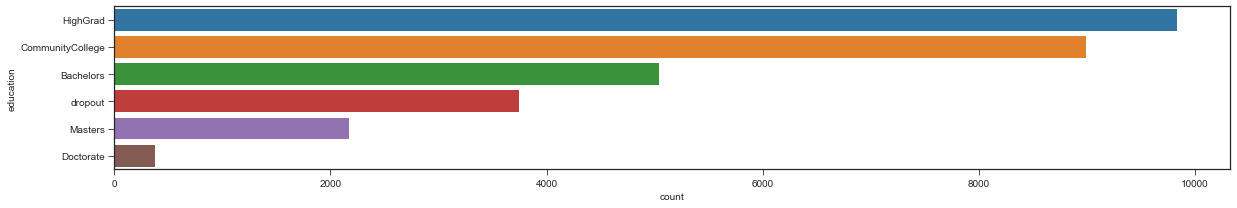

In [13]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df, order=my_df['education'].value_counts().index)

### Marital-status

In [14]:
#df2 = my_df['marital-status'].replace(' Never-married', 'NotMarried')
my_df['marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace([' Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace([' Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace([' Widowed'], 'Widowed',inplace=True)

C:\Users\Priyanka\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


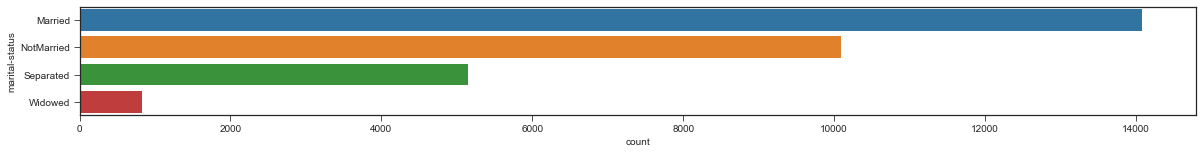

In [15]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df, order=my_df['marital-status'].value_counts().index)

### Occupation

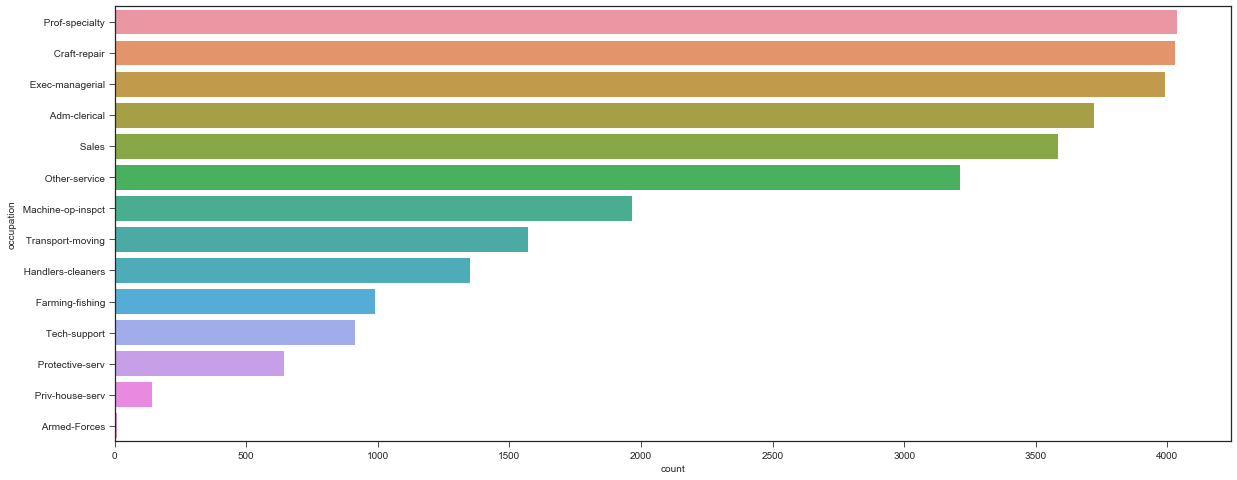

In [17]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,8)) 
sns.countplot(y="occupation", data=my_df, order=my_df['occupation'].value_counts().index)

### Workclass

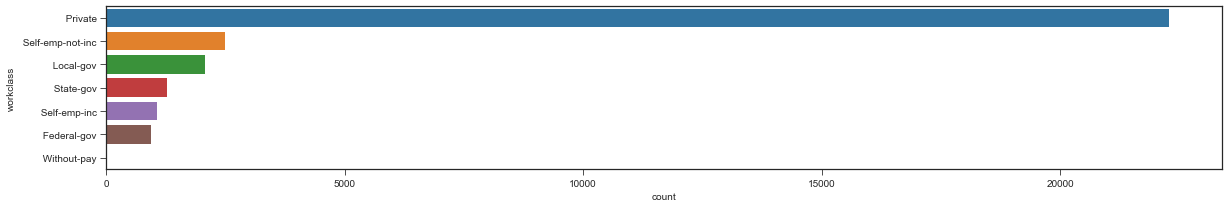

In [18]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df, order=my_df['workclass'].value_counts().index)

In [19]:
### Age

In [21]:
my_df['age_bin'] = pd.cut(my_df['age'], 20)

C:\Users\Priyanka\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,43.95911
0,<=50K,36.60806


<Figure size 1440x360 with 0 Axes>

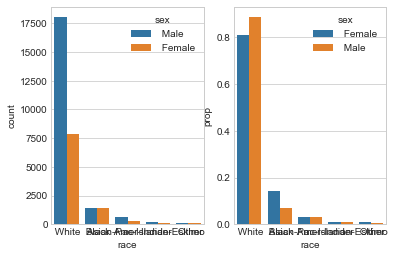

In [23]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

### Hours of Work

In [24]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']

C:\Users\Priyanka\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Priyanka\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Correlation Heatmap

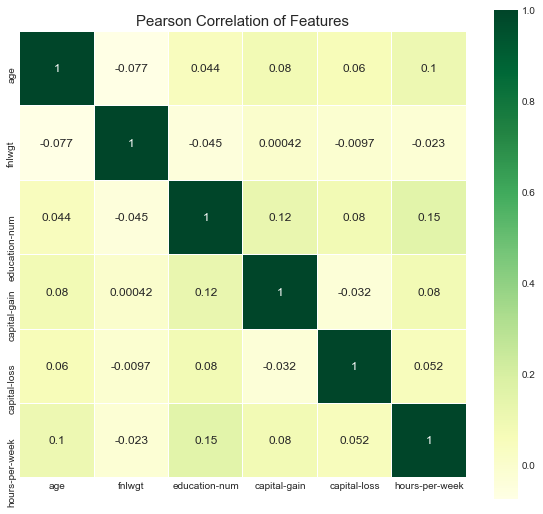

In [25]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(10, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(my_df)

In [26]:

# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [27]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin
0,22,5,2491,0,12,1,0,1,4,1,24,0,39,38,0,6,3
1,33,4,2727,0,12,0,3,0,4,1,0,0,12,38,0,9,1
2,21,2,13188,3,8,2,5,1,4,1,0,0,39,38,0,5,3
3,36,2,14354,5,6,0,5,0,2,1,0,0,39,38,0,9,3
4,11,2,18120,0,12,0,9,5,2,0,0,0,39,4,0,3,3


In [28]:
### Train-test split
y = my_df["predclass"]
X = my_df.drop(columns=["predclass"])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Creating Different Classification Models

In [31]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


log_reg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
#linear_svc = SVC(kernel='linear', random_state=0)
#poly_svc = SVC(kernel='poly', random_state=0)
rbf_svc = SVC(kernel='rbf', random_state=0)
sigmoid_svc = SVC(kernel='sigmoid', random_state=0)
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)

In [32]:
classifiers = [log_reg, knn, rbf_svc, sigmoid_svc, nb, dt, rf]
best_acc_score = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("\nModel: ", classifier)
    print("Confusion Matrix:\n", cm)
    new_acc_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score: ",new_acc_score)
    if new_acc_score > best_acc_score:
        best_acc_score = new_acc_score
        best_model = classifier
print("=="*50)
print("\nThe Best Model is: ", classifier)
print("With Accuracy Score: ",best_acc_score)

C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion Matrix:
 [[4189  343]
 [ 909  592]]
Accuracy Score:  0.7924747223603514

Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Confusion Matrix:
 [[4102  430]
 [ 967  534]]
Accuracy Score:  0.7684402453174208

Model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
Confusion Matrix:
 [[4532    0]
 [1501    0]]
Accura

### Model Selection From  Cross Validation Technique 

In [33]:
from sklearn.model_selection import cross_val_score
best_acc_score = 0
best_std = 0
for classifier in classifiers:
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    new_acc_score = accuracies.mean()*100
    new_std = accuracies.std()*100
    print(classifier)
    print("Accuracy: {:.2f} %".format(new_acc_score))
    print("Standard Deviation: {:.2f} %".format(new_std))
    print("="*100, "\n")
    
    if new_acc_score > best_acc_score:
        best_model = classifier
        best_acc_score = new_acc_score
        best_std = new_std

print("=="*50)
print("\nThe Best Model is: ", classifier)
print("Having Accuracy Score: ",best_acc_score)
print("With Standard Deviation: ", best_std)

C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 78.54 %
Standard Deviation: 0.93 %

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy: 77.04 %
Standard Deviation: 0.71 %

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
Accuracy: 75.10 %
Standard Deviation: 0.02 %

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='o

### The Random Forest Gives the Best accuracy with low standard deviation.